# Preprocessing pipeline 

1. [Load data](#load)
2. [Downsample](#downsample)
3. [Filters](#filters)
4. [Find events](#events)
5. [Create epochs](#epochs)
6. [Baseline correction](#baseline) 
7. [Reject bad epochs and channels using the adaptive algorithm](#reject)
8. [ICA](#ica)
   1. [EOG components](#eog)
   2. [ECG components](#ecg)
9. [Interpolate bad channels](#interpolate)
10. [Average reference](#rereference)

In [1]:
%matplotlib qt
import mne
import utils
import matplotlib.pyplot as plt

# from cleaner.report import create_ica_report 
# from cleaner import reject

# from nice_ext.algorithms.adaptive import _adaptive_egi

from autoreject import AutoReject, get_rejection_threshold

# Load data <a name="load"></a>

List of participants: 'VP07';'VP08';'VP09';'VP10';'VP11';'VP12';'VP13';'VP14';'VP18';'VP19';'VP20';'VP23';'VP24';'VP25';'VP26';'VP27';'VP28';'VP29';'VP30';'VP31';'VP32';'VP33';'VP35';'VP36';'VP37';

In [2]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'

In [3]:
all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']
participant = all_participants[1]

path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
# path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac

folder = path + participant +'/'
file = participant + '_crop_rMean_minmarker.set'

raw = mne.io.read_raw_eeglab(folder+file, preload = True,verbose = False)

raw = utils.set_montage(raw)

<ipython-input-3-a55dbd5ecf5c>:10: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(folder+file, preload = True,verbose = False)


In [237]:
raw.info['bads'] = []

# Downsample <a name="downsample"></a>

In [200]:
raw_downsampled = raw.copy().resample(sfreq=250)

# Filters <a name="filters"></a>
High-pass filter: 0.5Hz

Low-Pass filter: 45Hz

In [201]:
hpass = 0.5
lpass = 45

raw_filtered = raw_downsampled.copy().filter(l_freq=hpass, h_freq=lpass)

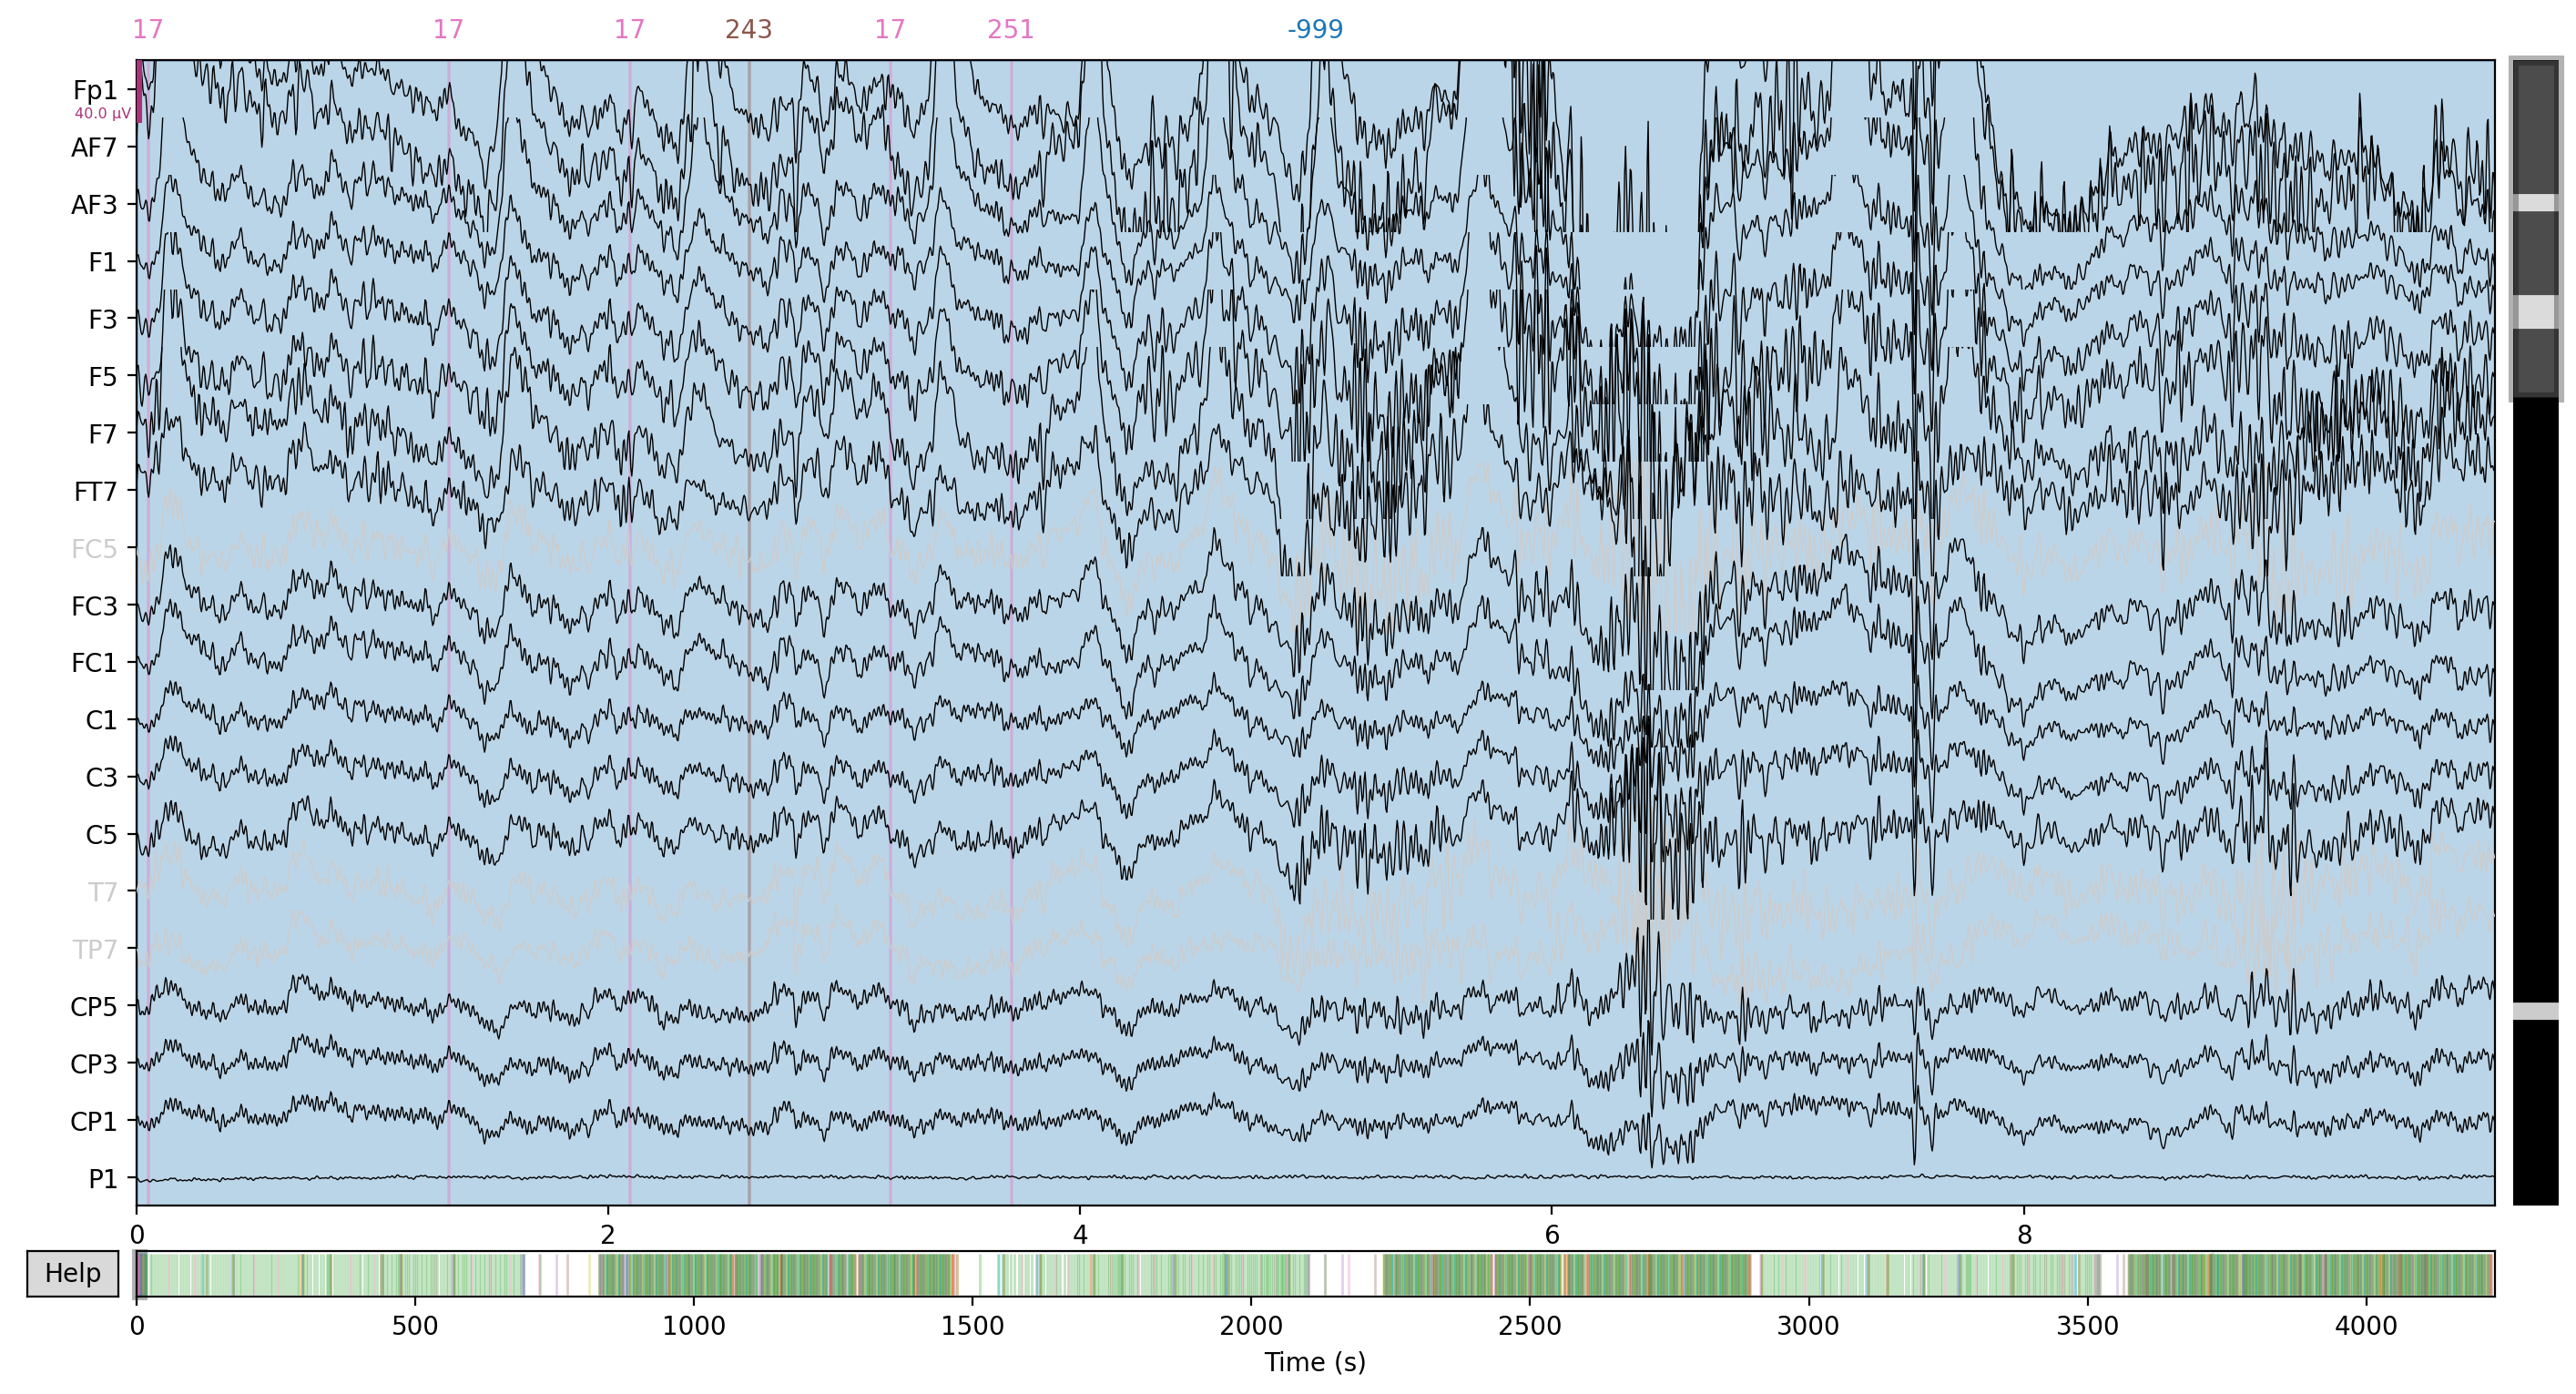

In [220]:
raw_filtered.plot()

In [221]:
### Save filtered data
raw_filtered.save(folder + participant + 'filt_raw.fif', overwrite = True)

Overwriting existing file.
Writing /Users/nicobruno/ownCloud/MW_eeg_data/minmarker/VP22/VP22filt_raw.fif
Closing /Users/nicobruno/ownCloud/MW_eeg_data/minmarker/VP22/VP22filt_raw.fif
[done]


# Find events <a name="events"></a>

In [4]:
raw_filtered = mne.io.read_raw(folder + participant + 'filt_raw.fif', preload = True)

Opening raw data file /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP08/VP08filt_raw.fif...
    Range : 0 ... 963688 =      0.000 ...  3854.752 secs
Ready.
Reading 0 ... 963688  =      0.000 ...  3854.752 secs...


In [8]:
events, event_dict = utils.make_correct_labels(raw_filtered, nb_prev_trials = 7)

Used Annotations descriptions: ['-999', '1', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '111', '12', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '17', '171', '173', '181', '191', '192', '2', '201', '202', '203', '204', '205', '206', '207', '208', '232', '233', '234', '238', '239', '251', '252', '253', '255', '3', '4', '5', '6', '7', '74', '80', '86', '9', '92', '99']


array([[   66483,        0, 22017000],
       [   67062,        0, 22116000],
       [   67641,        0, 22115000],
       ...,
       [  948984,        0, 11113105],
       [  949563,        0, 11102105],
       [  950143,        0, 11111105]])

# Create Epochs <a name="epochs"></a>

In [10]:
epochs = utils.create_epochs(epoch_type = epoch_type, raw = raw_filtered, events =  events, event_id = event_dict)
epochs.save(folder +  participant + '_' + epoch_type + '_epo.fif', overwrite = True)

# Reject Bad Epochs and Channels <a name="reject"></a>

In [225]:
ar = AutoReject(thresh_method = 'random_search', random_state=42)
epochs_clean = ar.fit_transform(epochs)  
reject = get_rejection_threshold(epochs)  

/Users/nicobruno/opt/anaconda3/lib/python3.8/site-packages/autoreject/utils.py:63: UserWarning: 3 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  warnings.warn(
Creating augmented epochs:  10%|▉         | 6/61 [00:00<00:00, 55.64it/s]

Running autoreject on ch_type=eeg


Computing thresholds ...: 100%|██████████| 61/61 [00:19<00:00,  3.09it/s]


Repairing epochs:   0%|          | 0/140 [00:00<?, ?it/s]

Repairing epochs:  16%|█▌        | 22/140 [00:00<00:00, 218.13it/s]

Repairing epochs:  31%|███▏      | 44/140 [00:00<00:00, 218.44it/s]

Repairing epochs:  47%|████▋     | 66/140 [00:00<00:00, 217.32it/s]

Repairing epochs:  65%|██████▌   | 91/140 [00:00<00:00, 224.55it/s]

Repairing epochs:  83%|████████▎ | 116/140 [00:00<00:00, 230.38it/s]

Repairing epochs: 100%|██████████| 140/140 [00:00<00:00, 217.55it/s]

n_interp:   0%|          | 0/3 [00:00<?, ?it/s]

Repairing epochs:   0%|          | 0/140 [00:00<?, ?it/s]

Repairing epochs:   4%|▍         | 6/140 [00:00<00:02, 55.91it/s]

Repairing epochs:   8%|▊         | 11/140 [00:00<00:02, 53.74it/s]

Repairing epochs:  16%|█▋        | 23/140 [00:00<00:01, 64.39it/s]

Repairing epochs:  24%|██▍       | 34/140 [00:00<00:01, 73.04it/s]

Repairing epochs:  30%|███       | 42/140 [00:00<00:01, 70.06it/s]

Re





Estimated consensus=0.10 and n_interpolate=1




Repairing epochs:   2%|▏         | 3/140 [00:00<00:04, 29.56it/s]

Repairing epochs:   6%|▌         | 8/140 [00:00<00:03, 33.38it/s]

Repairing epochs:  14%|█▍        | 20/140 [00:00<00:02, 42.58it/s]

Repairing epochs:  23%|██▎       | 32/140 [00:00<00:02, 52.68it/s]

Repairing epochs:  31%|███▏      | 44/140 [00:00<00:01, 63.25it/s]

Repairing epochs:  38%|███▊      | 53/140 [00:00<00:01, 66.92it/s]

Repairing epochs:  44%|████▍     | 62/140 [00:00<00:01, 69.35it/s]

Repairing epochs:  51%|█████     | 71/140 [00:00<00:00, 70.27it/s]

Repairing epochs:  56%|█████▋    | 79/140 [00:01<00:00, 65.82it/s]

Repairing epochs:  62%|██████▏   | 87/140 [00:01<00:00, 66.80it/s]

Repairing epochs:  68%|██████▊   | 95/140 [00:01<00:00, 66.76it/s]

Repairing epochs:  73%|███████▎  | 102/140 [00:01<00:00, 64.33it/s]

Repairing epochs:  78%|███████▊  | 109/140 [00:01<00:00, 64.71it/s]

Repairing epochs:  84%|████████▍ | 118/140 [00:01<00:00, 69.06it/s]

Repairing epochs:  90%|█████████ | 126/140 [0

Estimating rejection dictionary for eeg
Estimating rejection dictionary for eog


In [226]:
epochs_clean.save(folder +  participant + '_' + epoch_type + '_' +  'ar_clean_epo.fif', overwrite = True)

Overwriting existing file.


In [227]:
print(len(epochs), len(epochs_clean))
print((len(epochs) - len(epochs_clean)) *100/len(epochs) )

140 114
18.571428571428573


# ICA <a name="ica"></a>

In [210]:
epochs_clean = mne.read_epochs(folder +  participant + '_' + epoch_type + '_' + 'ar_clean_epo.fif')
# epochs_clean.info

Reading /Users/nicobruno/ownCloud/MW_eeg_data/minmarker/VP30/VP30_evoked_ar_clean_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
565 matching events found
No baseline correction applied
0 projection items activated


In [211]:
n_components = 0.99  # Should normally be higher, like 0.999!!
method = 'fastica'
max_iter = 512  # Should normally be higher, like 500 or even 1000!!
fit_params = dict(fastica_it=5)
random_state = 42

ica = mne.preprocessing.ICA(n_components=n_components,
                            method=method,
                            max_iter=max_iter,
#                             fit_params=fit_params,
                            random_state=random_state)

ica.fit(epochs_clean)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by explained variance: 38 components
Fitting ICA took 6.1s.


<ICA | epochs decomposition, fit (fastica): 113565 samples, 38 components, channels used: "eeg">

In [212]:
tmin, tmax = -0.2, 0.6

baseline = (None,0)

eog_epochs = mne.preprocessing.create_eog_epochs(raw, reject=None,
                                                 baseline=baseline,
                                                 tmin=tmin, tmax=tmax)
eog_evoked = eog_epochs.average()
eog_inds, eog_scores = ica.find_bads_eog(
    eog_epochs)

# components_to_exclude = ecg_inds + eog_inds
components_to_exclude = eog_inds
ica.exclude = components_to_exclude

EOG channel index for this subject is: [64 65 66 67]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 6 significant peaks
Number of EOG events detected : 6
Not setting metadata
Not setting metadata
6 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
Loading data for 6 events and 410 original time points ...
0 bad epochs dropped


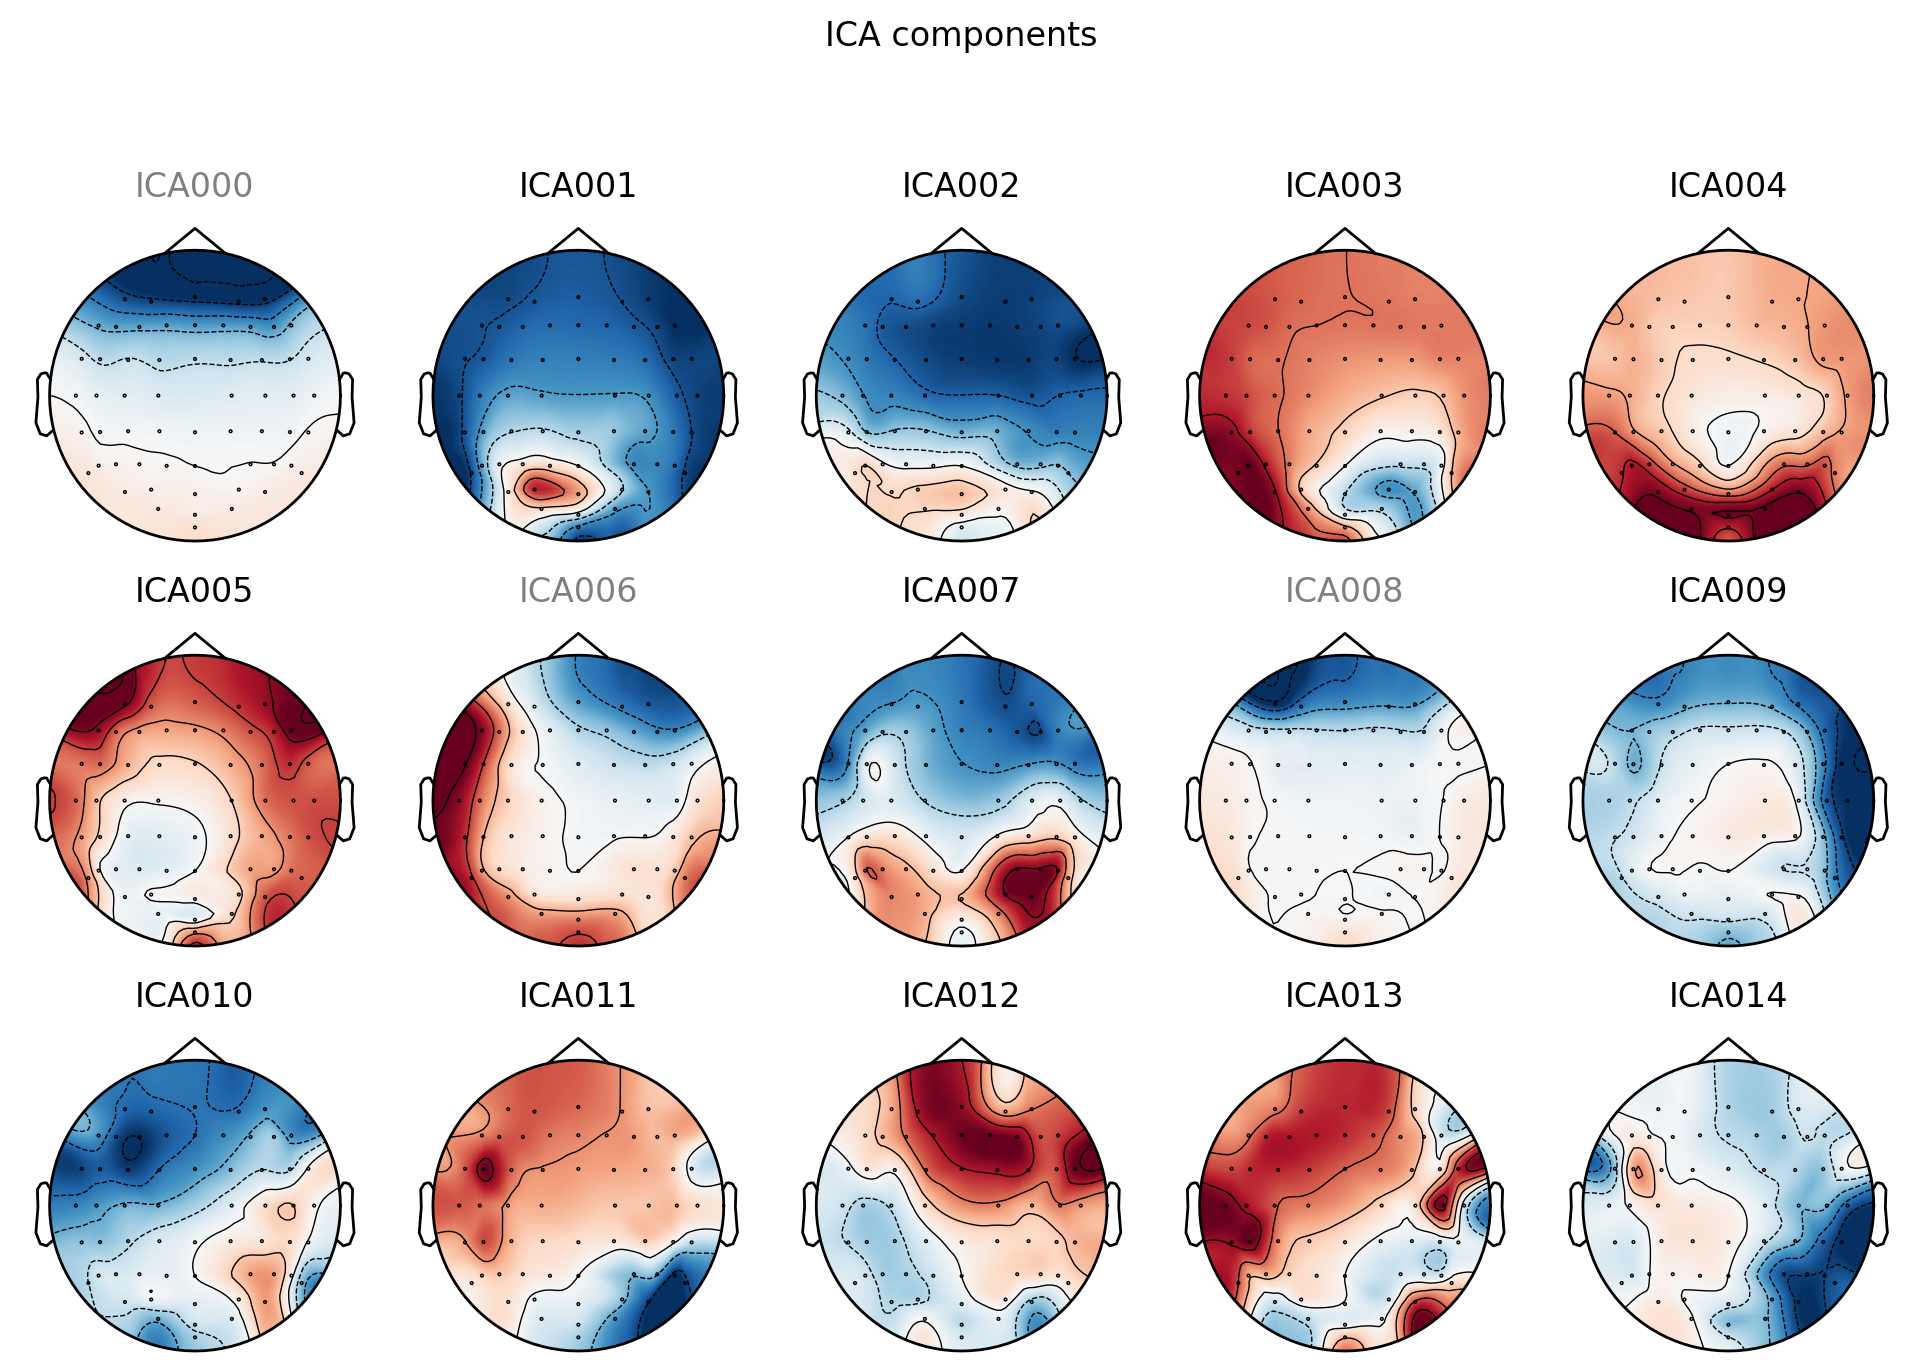

In [179]:
ica.plot_components(inst = epochs_clean,picks=range(15))

Not setting metadata
Not setting metadata
565 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-213-5e6ac89eb2f8>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  ica.plot_sources(epochs_clean, block=False)


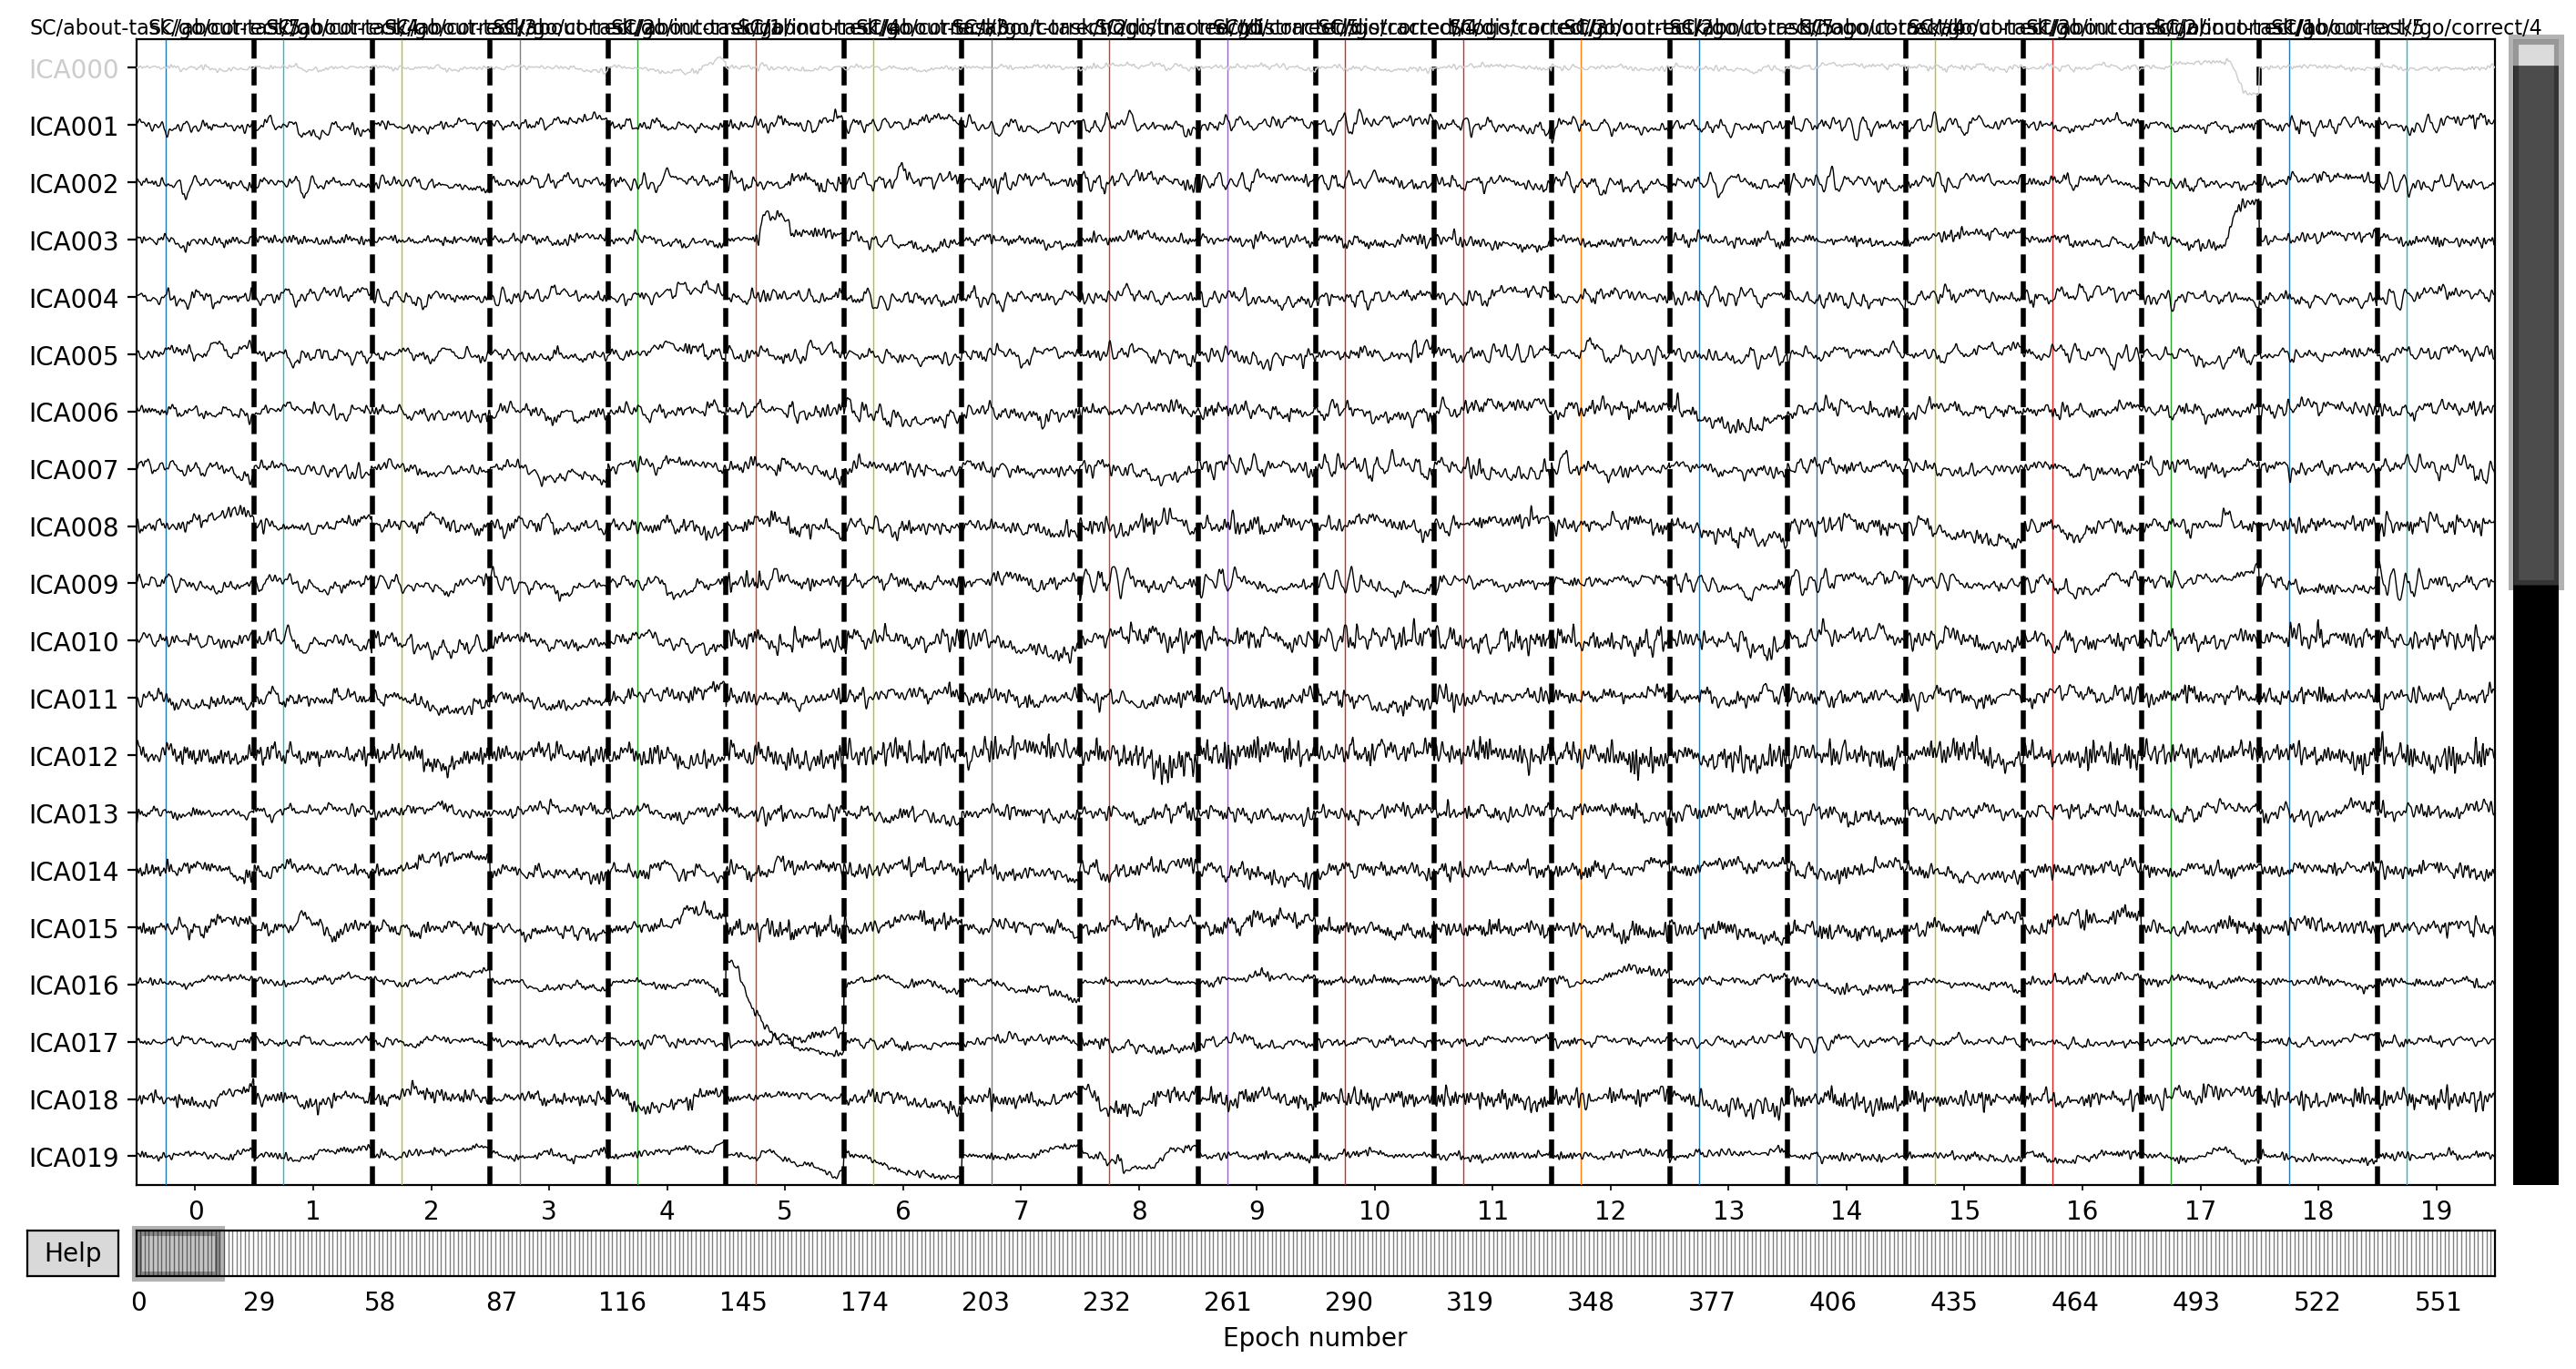

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
565 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
565 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
565 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [213]:
ica.plot_sources(epochs_clean, block=False)

In [214]:
epochs_ica = ica.apply(inst = epochs_clean)
epochs_ica.save(folder +  participant + '_' + epoch_type + '_' +  'ar_ica_epo.fif', overwrite = True)

# Interpolate bad channels <a name="interpolate"></a>


epochs_interpolate = epochs_ica.copy().interpolate_bads()
epochs_interpolate.save(folder +  participant + '_' + epoch_type + '_' +  'ar_interpolate_epo.fif', overwrite = True)

# Average Rereference <a name="rereference"></a>

epochs_rereferenced, ref_data = mne.set_eeg_reference(inst = epochs_interpolate, ref_channels = 'average', copy = True)
epochs_rereferenced.save(folder +  participant + '_' + epoch_type + '_' +  'ar_rereferenced_epo.fif', overwrite = True)

# Subtract ERP

epochs_subtracted = epochs_rereferenced.copy().subtract_evoked()
epochs_subtracted.save(folder +  participant + '_' + epoch_type + '_' +  'ar_subtracted_epo.fif', overwrite = True)

Applying ICA to Epochs instance
    Transforming to ICA space (38 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<ipython-input-214-94f68e287bb3>:7: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epochs_interpolate = epochs_ica.copy().interpolate_bads()


Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EXG5, EXG6, EXG3, EXG4
[done]


In [12]:
epochs_ica = ica.apply(inst = epochs_clean)
epochs_ica.save(folder +  participant + '_' + epoch_type + '_' +  'ar_ica_epo.fif', overwrite = True)

Applying ICA to Epochs instance
    Transforming to ICA space (41 components)
    Zeroing out 2 ICA components
    Projecting back using 62 PCA components


# Interpolate bad channels <a name="interpolate"></a>


In [13]:
epochs_interpolate = epochs_ica.copy().interpolate_bads()
epochs_interpolate.save(folder +  participant + '_' + epoch_type + '_' +  'ar_interpolate_epo.fif', overwrite = True)

Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 62 sensor positions
Interpolating 2 sensors


# Average Rereference <a name="rereference"></a>

In [14]:
epochs_rereferenced, ref_data = mne.set_eeg_reference(inst = epochs_interpolate, ref_channels = 'average', copy = True)
epochs_rereferenced.save(folder +  participant + '_' + epoch_type + '_' +  'ar_rereferenced_epo.fif', overwrite = True)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


# Subtract ERP

In [15]:
epochs_subtracted = epochs_rereferenced.copy().subtract_evoked()
epochs_subtracted.save(folder +  participant + '_' + epoch_type + '_' +  'ar_subtracted_epo.fif', overwrite = True)

Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EXG5, EXG6, EXG3, EXG4
[done]


In [ ]:
epochs_rereferenced.average().plot()
epochs_subtracted.average().plot()

In [ ]:
epochs_rereferenced.plot()